### 1. Importing all the essential libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### 2. Loading the data

In [3]:
data = pd.read_csv("language.csv")

In [6]:
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [7]:
data.isna().sum()

Text        0
language    0
dtype: int64

In [8]:
data.shape

(22000, 2)

In [9]:
data["language"].value_counts()

language
Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: count, dtype: int64

### 3. Data Preprocessing

In [14]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define normalization dictionary
normalization_dict = {'u.s.a': 'usa', 'usa': 'usa', 'U.S.A': 'usa'}

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    # (2) Convert to lowercase
    text = text.lower()

    # (3) Tokenization
    tokens = word_tokenize(text)

    # (4) Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # (5) Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # (6) Stopwords removal
    tokens = [word for word in tokens if word not in stop_words]

    # (7) Normalization
    tokens = [normalization_dict[word] if word in normalization_dict else word for word in tokens]

    # (8) Stemming & Lemmatization
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens]

    # (9) Convert tokens back to a cleaned sentence
    return ' '.join(tokens)



# Apply preprocessing
data['clean_text'] = data['Text'].apply(preprocess_text)

# Display results
print(data[['Text', 'clean_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text  \
0  klement gottwaldi surnukeha palsameeriti ning ...   
1  sebes joseph pereira thomas  på eng the jesuit...   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4  de spons behoort tot het geslacht haliclona en...   

                                          clean_text  
0  klement gottwaldi surnukeha palsameer ning pai...  
1  sebe joseph pereira thoma på eng jesuit sino-r...  
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...  
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...  
4  de spon behoort tot het geslacht haliclona en ...  


In [16]:
data.head(10)

,Text,language,clean_text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma på eng jesuit sino-r...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclona en ...
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish,tsutinalar i̇ngilizc tsuutina kanadada alberta...
7,müller mox figura centralis circulorum doctoru...,Latin,müller mox figura centrali circulorum doctorum...
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu,برقی بار electr charg تمام زیرجوہری ذرات کی ا ...
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...


C:\Users\ashmi\AppData\Local\Temp\ipykernel_12204\2706643384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['language'], palette="viridis")


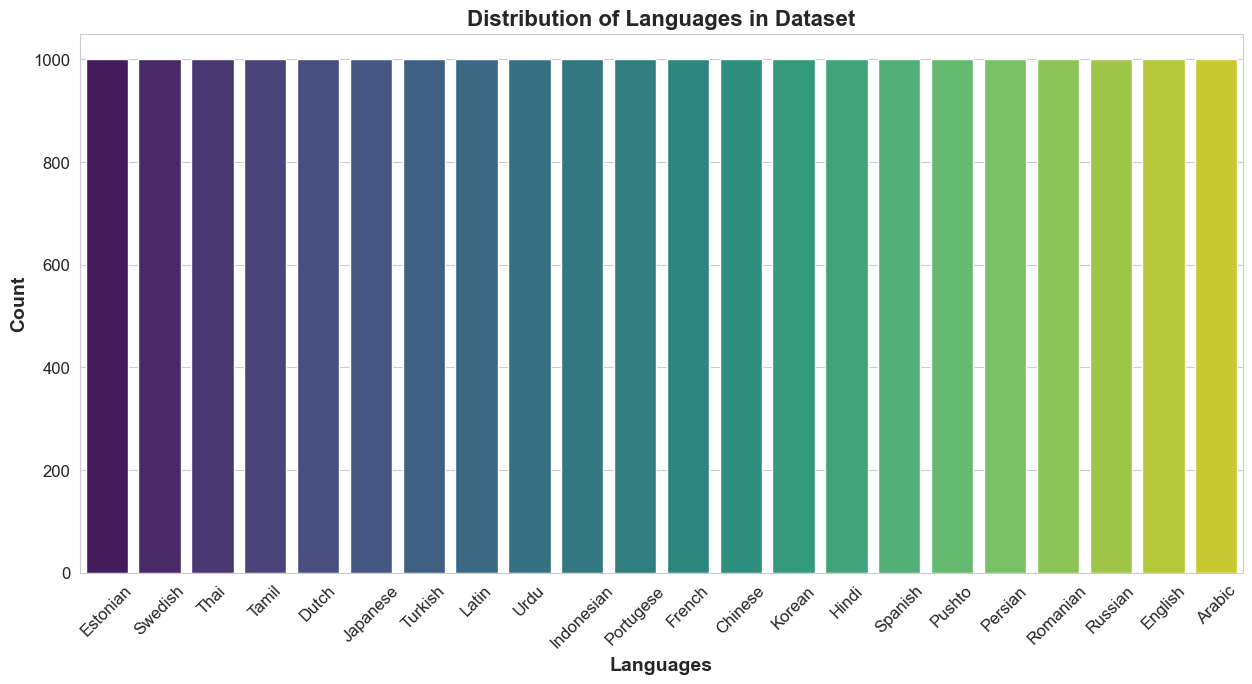

In [22]:

# Set Seaborn style
sns.set_style("whitegrid")

# Adjust figure size
plt.figure(figsize=(15, 7))

# Create a count plot with a vibrant color palette
ax = sns.countplot(x=data['language'], palette="viridis")

# Improve readability
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.xlabel("Languages", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Distribution of Languages in Dataset", fontsize=16, fontweight="bold")

# Show the plot
plt.show()


### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [23]:
x = data.iloc[:,0] # Independent Variable
y = data.iloc[:,1] # Dependent Variable

In [24]:
y.head()

0    Estonian
1     Swedish
2        Thai
3       Tamil
4       Dutch
Name: language, dtype: object

In [25]:
x.head()

0    klement gottwaldi surnukeha palsameeriti ning ...
1    sebes joseph pereira thomas  på eng the jesuit...
2    ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3    விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4    de spons behoort tot het geslacht haliclona en...
Name: Text, dtype: object

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying CountVectorizer (Bag of Words - BOW)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(x_train)
X_test_vect = vectorizer.transform(x_test)


### Create pipeline

In [30]:
from sklearn.pipeline import Pipeline
model_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
model_pipeline.fit(x_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

## Prediction & Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model_pipeline.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9422727272727273
Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.96      0.49      0.65       201
       Dutch       0.98      0.98      0.98       230
     English       0.68      1.00      0.81       194
    Estonian       0.99      0.95      0.97       200
      French       0.94      0.99      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.98      0.64      0.78       194
      Korean       0.99      0.99      0.99       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.99      1.00       196
   Portugese       0.99      0.96      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.98      0.98      0.98       197
     Russian       0.99      0.99      0.99       213
     Spanish       0.97     

### Creating a Pickle File
Save the trained model for future use.

In [32]:
import pickle

with open('language_model.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)


In [33]:
with open('language_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

sample_text = ["Bonjour, comment allez-vous?"]
prediction = loaded_model.predict(sample_text)
print("Predicted Language:", prediction[0])


Predicted Language: French


In [34]:
with open('language_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

sample_text = ["Este es un modelo de detección de idioma."]
prediction = loaded_model.predict(sample_text)
print("Predicted Language:", prediction[0])


Predicted Language: Spanish
